In [1]:
import pandas as pd
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from matplotlib import pyplot as plt

plt.rc("font", family="AppleGothic")

In [2]:
suncream_df = pd.read_csv("./preprocessed_data/preprocessed_suncream_data.csv",encoding ="utf-8",low_memory=False)
sunstic_df = pd.read_csv("./preprocessed_data/preprocessed_sunstic_data.csv",encoding ="utf-8")
suncushion_df = pd.read_csv("./preprocessed_data/preprocessed_suncushion_data.csv",encoding ="utf-8")
sunpatch_df = pd.read_csv("./preprocessed_data/preprocessed_sunpatch_data.csv",encoding ="utf-8")
sunspray_df = pd.read_csv("./preprocessed_data/preprocessed_sunspray_data.csv",encoding ="utf-8")

FileNotFoundError: [Errno 2] No such file or directory: './preprocessed_data/preprocessed_suncream_data.csv'

In [3]:
from tqdm.notebook import tqdm

tqdm.pandas()
def process_reviews(dfs, column_name='processed_review'):
    for df in dfs:
        df[column_name] = df[column_name].progress_apply(lambda x: eval(x))

dataframes = [suncream_df, sunstic_df, suncushion_df, sunpatch_df, sunspray_df]

process_reviews(dataframes)

  0%|          | 0/139007 [00:00<?, ?it/s]

  0%|          | 0/25743 [00:00<?, ?it/s]

  0%|          | 0/14358 [00:00<?, ?it/s]

  0%|          | 0/2544 [00:00<?, ?it/s]

  0%|          | 0/1559 [00:00<?, ?it/s]

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
combined_df = pd.concat([suncream_df[['category', 'processed_review']],
                        sunstic_df[['category', 'processed_review']],
                        suncushion_df[['category', 'processed_review']],
                        sunpatch_df[['category', 'processed_review']],
                        sunspray_df[['category', 'processed_review']],], ignore_index=True)

In [6]:
combined_df['processed_review'] = combined_df['processed_review'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

In [7]:
combined_df

,category,processed_review
0,suncream,진심 이번 기획 장바구니 세일 시작 판매 종료 이게 무슨 일이야 기획 상품 인기 기...
1,suncream,자극 무난 데일리 백탁 그런지 촉촉 피부 예민 신분 본인 여드름성 피부 톤업 촉촉 ...
2,suncream,발림성 건조 무기자차 에스트라 스킨 케어 고민 찰나 귀여운 기획 세트 컬러 로션 보...
3,suncream,에스트라 무기자차 예전 샘플 좋아서 수난 시대 과정 피부 사계절 무기자차 겨울 건조...
4,suncream,피부 타입 민감성 수부지 타입 유기자차 트러블 절대 무기자차 자극 트러블 적도 민감...
...,...,...
183206,sunspray,
183207,sunspray,여름 기존 아넷사 온몸 스프 간편
183208,sunspray,처음 기대
183209,sunspray,여름 팔 종아리 발 아넷사 신제품


In [8]:
documents = combined_df.groupby('category')['processed_review'].apply(lambda x: ' '.join(x)).reset_index()

In [9]:
documents

,category,processed_review
0,suncream,진심 이번 기획 장바구니 세일 시작 판매 종료 이게 무슨 일이야 기획 상품 인기 기...
1,suncushion,무조건 이거 처음 출시 생기 톤업 이름 식물나라 톤업 최고 최고 추천 후기 요약 톤...
2,sunpatch,요즘 햇빛 햇빛 잡티 잡티 케어 신경 밖 잡티 광대 부위 쿨링감 가성비 해외여행 크...
3,sunspray,좋아서 여름 물 몰이 예정 가격 간편 워터프루프 기분 납 니다 요즘 햇살 조금 꿀 ...
4,sunstick,뽀송 마무리 발림성 좋아서 정도 만족 얼굴 남자친구 선물 안끈적 재구매 의사 프로 ...


In [10]:
def custom_tokenizer(text):
    text = text.replace('뽀송', '보송')
    return text.split()

In [11]:
tfidf = TfidfVectorizer(tokenizer=custom_tokenizer)

In [12]:
tfidf_csr_matrix = tfidf.fit_transform(documents['processed_review'])

/Users/ayounglee/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [13]:
tfidf_csr_matrix

<5x12469 sparse matrix of type '<class 'numpy.float64'>'
	with 25125 stored elements in Compressed Sparse Row format>

In [67]:
tfidf_df = pd.DataFrame(tfidf_csr_matrix.toarray(), index=documents['category'], columns=tfidf.get_feature_names_out())

In [75]:
tfidf_df

,+0,-1,-2,-3,-4,-5,-d,.bb,.bi,.bn,...,히어로,히우,히친,히터,히트,히피,힐러,힐링,힐스,힘
category,,,,,,,,,,,,,,,,,,,,,
suncream,0.000018,0.000129,0.000506,0.000596,0.000680,0.000268,0.000018,0.000043,0.000018,0.000000,...,0.000014,0.000000,0.000018,0.000916,0.000106,0.000018,0.000739,0.000236,0.000018,0.002324
suncushion,0.000000,0.000085,0.000427,0.000722,0.001155,0.000341,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000811,0.000000,0.000000
sunpatch,0.000000,0.000000,0.000000,0.000560,0.001119,0.000662,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.001174,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001573
sunspray,0.000000,0.001312,0.001312,0.002219,0.001109,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003119
sunstick,0.000000,0.000120,0.000661,0.002391,0.001373,0.000241,0.000000,0.000086,0.000000,0.000213,...,0.000172,0.000000,0.000000,0.000000,0.000000,0.000000,0.000344,0.000357,0.000000,0.000000


In [68]:
suncream_top_keywords = tfidf_df.loc['suncream'].nlargest(10)
sunstic_top_keywords = tfidf_df.loc['sunstick'].nlargest(10)
suncushion_top_keywords = tfidf_df.loc['suncushion'].nlargest(10)
sunpatch_top_keywords = tfidf_df.loc['sunpatch'].nlargest(10)
sunspray_top_keywords = tfidf_df.loc['sunspray'].nlargest(10)

In [81]:
tfidf_df.sum(axis=1)

category
suncream      13.098295
suncushion    12.206963
sunpatch      12.702205
sunspray      11.427585
sunstick      14.315623
dtype: float64

# suncream_top_keywords tf-idf

category
suncream      0.311507
suncushion    0.185298
sunpatch      0.060429
sunspray      0.028847
sunstick      0.132496
Name: 촉촉, dtype: float64


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'suncream'),
  Text(1, 0, 'suncushion'),
  Text(2, 0, 'sunpatch'),
  Text(3, 0, 'sunspray'),
  Text(4, 0, 'sunstick')])

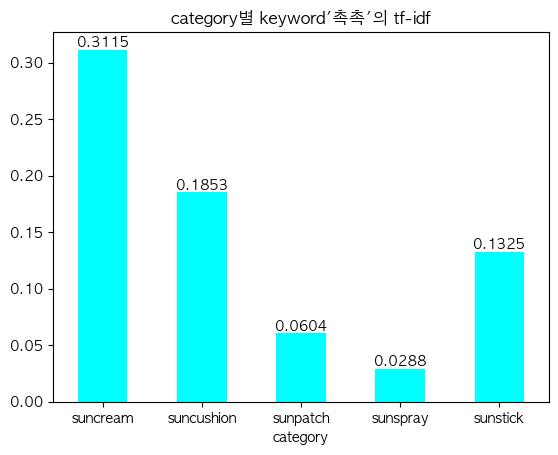

In [56]:
keyword = '촉촉'  
tfidf_values_for_keyword = tfidf_df[keyword]
print(tfidf_values_for_keyword)

bars = tfidf_values_for_keyword.plot(kind="bar", color = "cyan")
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval,4), ha = "center", va ="bottom") 

plt.title(f"category별 keyword'{keyword}'의 tf-idf")
plt.xticks(rotation=0)

# 촉촉이란 키워드가 다른 카테고리에 비해 중요해보였다.

category
suncream      0.350065
suncushion    0.426646
sunpatch      0.001323
sunspray      0.000000
sunstick      0.030308
Name: 톤업, dtype: float64


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'suncream'),
  Text(1, 0, 'suncushion'),
  Text(2, 0, 'sunpatch'),
  Text(3, 0, 'sunspray'),
  Text(4, 0, 'sunstick')])

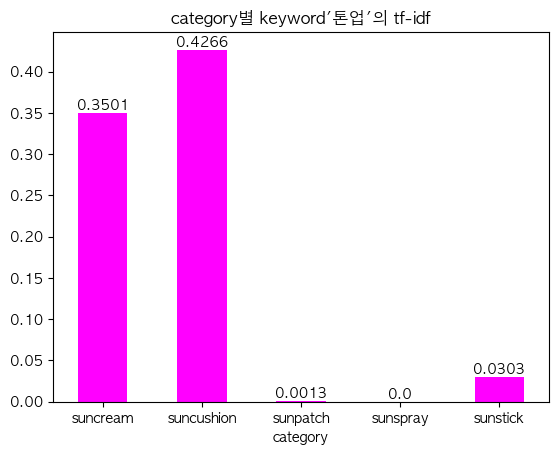

In [59]:
keyword = '톤업'  
tfidf_values_for_keyword = tfidf_df[keyword]
print(tfidf_values_for_keyword)

bars = tfidf_values_for_keyword.plot(kind="bar",color = "magenta")
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval,4), ha = "center", va ="bottom") 

plt.title(f"category별 keyword'{keyword}'의 tf-idf")
plt.xticks(rotation=0)

category
suncream      0.244538
suncushion    0.063714
sunpatch      0.000560
sunspray      0.008876
sunstick      0.199379
Name: 발림성, dtype: float64


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'suncream'),
  Text(1, 0, 'suncushion'),
  Text(2, 0, 'sunpatch'),
  Text(3, 0, 'sunspray'),
  Text(4, 0, 'sunstick')])

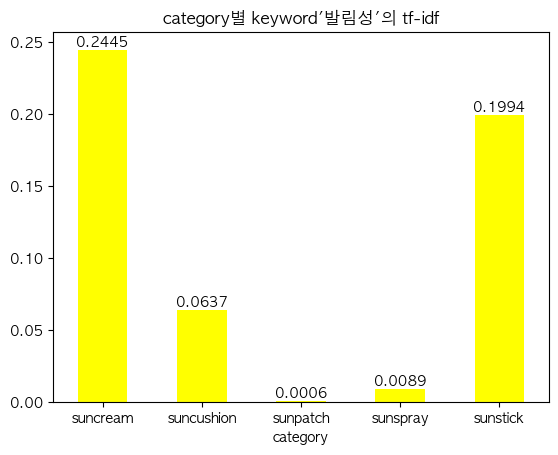

In [58]:
keyword = '발림성'  
tfidf_values_for_keyword = tfidf_df[keyword]
print(tfidf_values_for_keyword)

bars = tfidf_values_for_keyword.plot(kind="bar", color = "yellow")
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval,4), ha = "center", va ="bottom") 

plt.title(f"category별 keyword'{keyword}'의 tf-idf")
plt.xticks(rotation=0)

category
suncream      0.061732
suncushion    0.059601
sunpatch      0.002238
sunspray      0.049927
sunstick      0.428207
Name: 보송, dtype: float64


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'suncream'),
  Text(1, 0, 'suncushion'),
  Text(2, 0, 'sunpatch'),
  Text(3, 0, 'sunspray'),
  Text(4, 0, 'sunstick')])

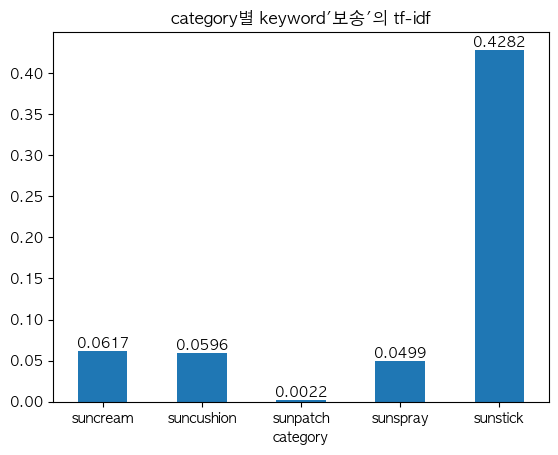

In [61]:
keyword = '보송' 
tfidf_values_for_keyword = tfidf_df[keyword]
print(tfidf_values_for_keyword)

bars = tfidf_values_for_keyword.plot(kind="bar")
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval,4), ha = "center", va ="bottom") 
plt.title(f"category별 keyword'{keyword}'의 tf-idf")
plt.xticks(rotation=0)

category
suncream      0.013266
suncushion    0.177620
sunpatch      0.000662
sunspray      0.000000
sunstick      0.003789
Name: 퍼프, dtype: float64


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'suncream'),
  Text(1, 0, 'suncushion'),
  Text(2, 0, 'sunpatch'),
  Text(3, 0, 'sunspray'),
  Text(4, 0, 'sunstick')])

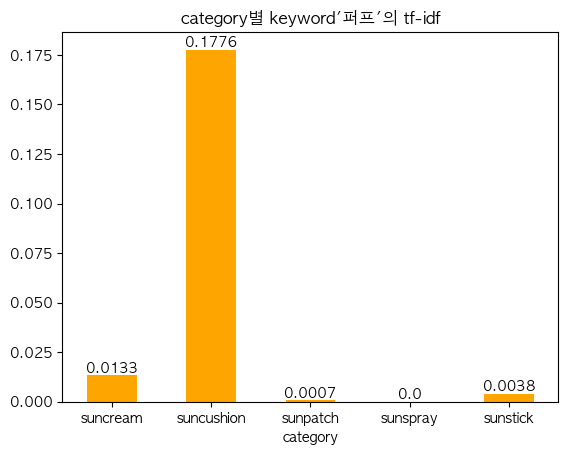

In [63]:
keyword = '퍼프' 
tfidf_values_for_keyword = tfidf_df[keyword]
print(tfidf_values_for_keyword)

bars = tfidf_values_for_keyword.plot(kind="bar", color = "orange")
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval,4), ha = "center", va ="bottom") 
plt.title(f"category별 keyword'{keyword}'의 tf-idf")
plt.xticks(rotation=0)

category
suncream      0.001041
suncushion    0.002309
sunpatch      0.328445
sunspray      0.018861
sunstick      0.007985
Name: 골프, dtype: float64


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'suncream'),
  Text(1, 0, 'suncushion'),
  Text(2, 0, 'sunpatch'),
  Text(3, 0, 'sunspray'),
  Text(4, 0, 'sunstick')])

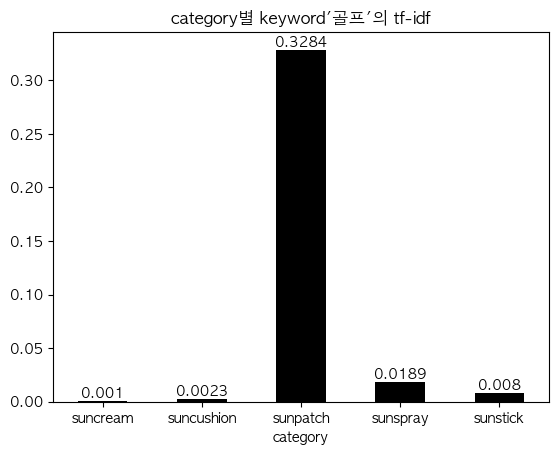

In [64]:
keyword = '골프'  
tfidf_values_for_keyword = tfidf_df[keyword]
print(tfidf_values_for_keyword)

bars = tfidf_values_for_keyword.plot(kind="bar", color="black")
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval,4), ha = "center", va ="bottom") 

plt.title(f"category별 keyword'{keyword}'의 tf-idf")
plt.xticks(rotation=0)